# Interview Question. Topic Geometry Based Machine Learning
In this example, you are tasked with coming up with a machine learning methodology to predict airfoil performance at a given test condition. What I am looking for is understanding your thought process, seeing your documentation skills, your skills in github, and the last objective is to accurately predict the performance. If you are able to predict the performance, you must show how you measured that. 


**Note: You are not required to use Jupyter Notebook. You can code a simple .py file or if you want to use another language that's fine too.**


# Dataset Walkthrough
Download the dataset by running the code below.

In [9]:
!rm -rf json/
!wget https://nasa-public-data.s3.amazonaws.com/plot3d_utilities/airfoil-learning-dataset.zip
!unzip airfoil-learning-dataset.zip
!rm airfoil-learning-dataset.zip 

--2022-02-09 16:33:47--  https://nasa-public-data.s3.amazonaws.com/plot3d_utilities/airfoil-learning-dataset.zip
Resolving nasa-public-data.s3.amazonaws.com (nasa-public-data.s3.amazonaws.com)... 52.217.94.252
Connecting to nasa-public-data.s3.amazonaws.com (nasa-public-data.s3.amazonaws.com)|52.217.94.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1569105133 (1.5G) [application/zip]
Saving to: ‘airfoil-learning-dataset.zip.1’

airfoil-learning-da 100%[===================>]   1.46G  25.9MB/s    in 49s     

2022-02-09 16:34:36 (30.5 MB/s) - ‘airfoil-learning-dataset.zip.1’ saved [1569105133/1569105133]

Archive:  airfoil-learning-dataset.zip
  inflating: json/2032c-il - 20-32C AIRFOIL.json  
  inflating: json/a18-il - A18 (original).json  
  inflating: json/a63a108c-il - NASA_AMES 63A108 MOD C AIRFOIL.json  
  inflating: json/ag04-il - AG04.json  
  inflating: json/ag09-il - AG09.json  
  inflating: json/ag11-il - AG11.json  
  inflating: json/ag13-il - A

## What is all this data?
Now that the dataset has been downloaded, there's a folder called json and this contains all the airfoils with their performance characteristics. Airfoil Performance is taken at a flow velocity which is the Reynolds Number, angle of attack, turbulence level (Ncrit)

**Reynolds Number (Re)** is a non-dimensional way to measure flow velocity. The equation is $Re = \frac{\rho U c }{\mu}$. $c$ is the airfoil chord measured from leading edge to trailing edge. 

**Pitch angle known as angle of attack(aoa or $\alpha$)**. Imagine you are in a car and you stick your hand out the window. The angle of attack is the angle you set your hand at out the window. We use this reference frame for airfoils as well. 

**[Ncrit](https://repository.tudelft.nl/islandora/object/uuid:e2b9ea1f-5fa1-47c0-82ad-64d1c74a5378/datastream/OBJ/download)** is a parameter used to trigger transition in the flow. It is a function of Turbulence intensity. Lower N means lower turbulence.




## Lets plot some of the data

<Figure size 432x288 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 4500x5400 with 0 Axes>

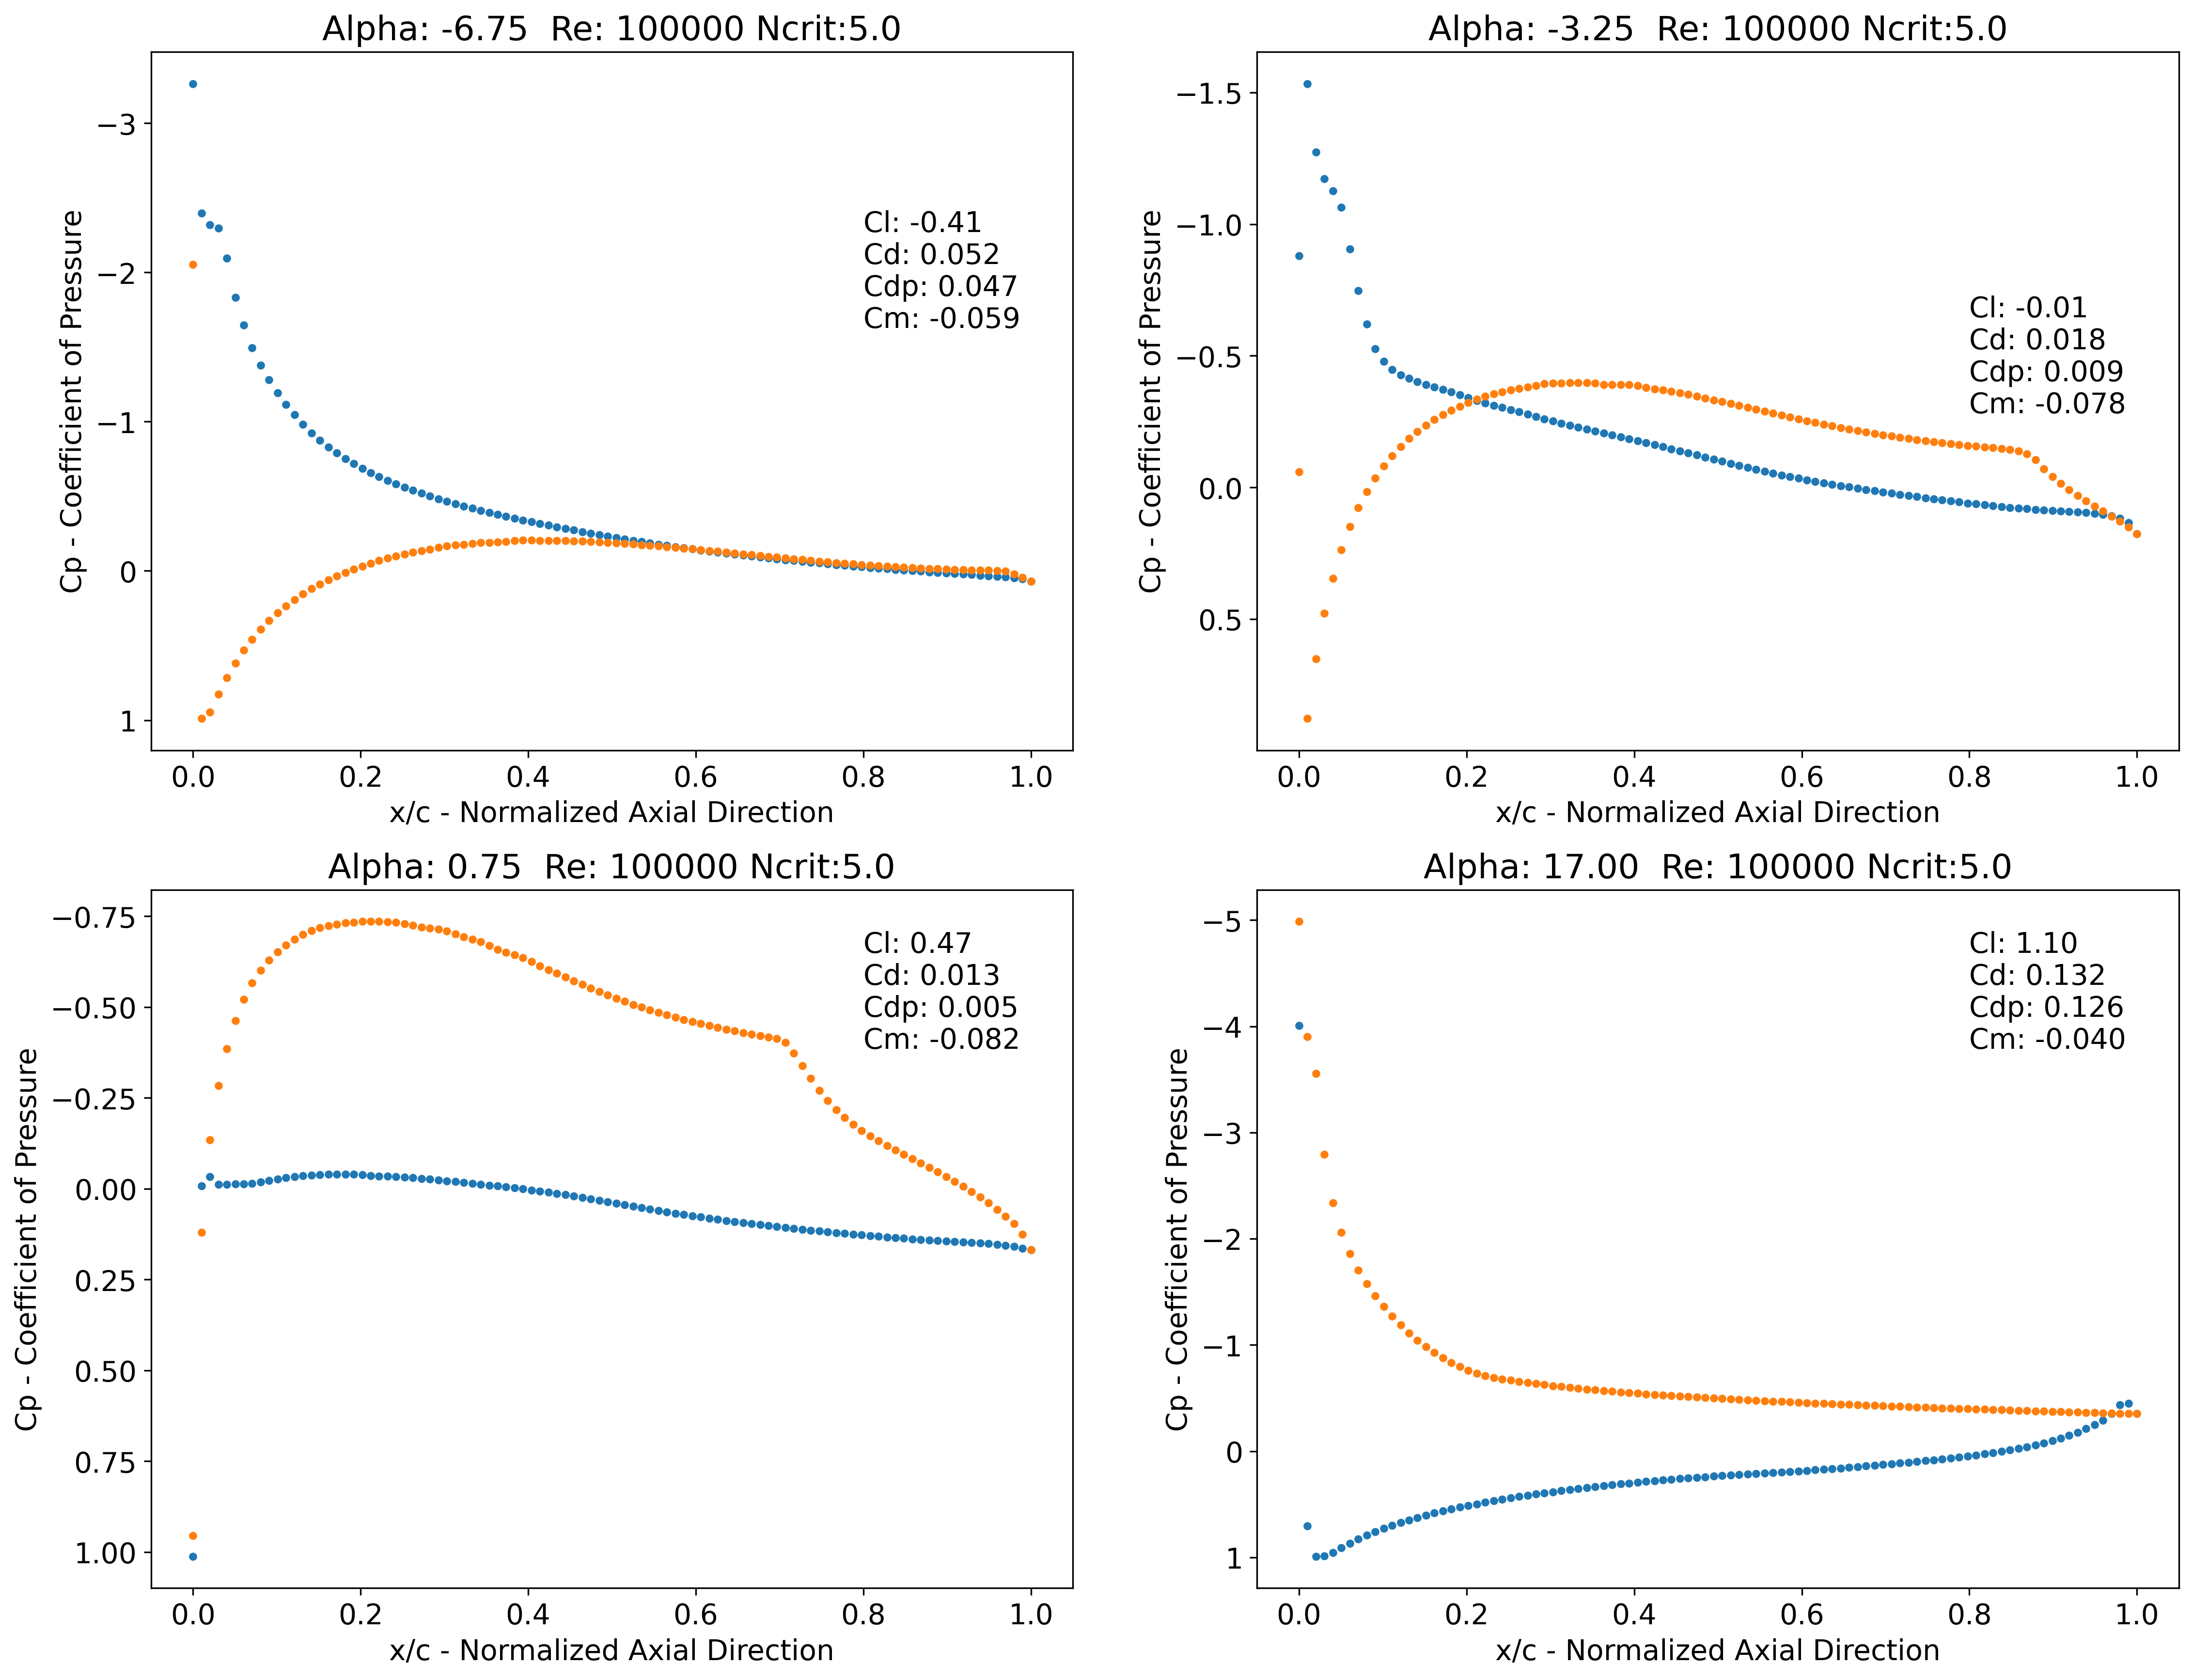

In [12]:
'''
    Pulls random data from the json file and selects a random reynolds number, ncrit
        - plots a geometry
        - plots Cl vs alpha
        - plots Cd vs. alpha
        - plots Cdp vs. alpha
        - plots Cm vs. alpha
        - plots several Cp at different angle of attacks 
    
    alpha = angle of atack 
'''
import os
import os.path as osp
import json
import glob
import random
from typing import Dict
import matplotlib.pyplot as plt
import pandas as pd
from typing import List
import numpy as np

def plot_airfoil_data(airfoil:Dict):
    polars = pd.DataFrame(airfoil['polars'])
    unique_reynolds = polars['Re'].unique()
    reynolds = unique_reynolds[random.randrange(0, len(unique_reynolds), 1)]
    
    polars = polars[polars['Re'] == reynolds]
    unique_ncrit = polars['Ncrit'].unique()
    ncrit = unique_ncrit[random.randrange(0, len(unique_ncrit), 1)]

    polars = polars[polars['Ncrit'] == ncrit]

    # newDict = dict(filter(lambda x: x['Re'] % 2 == 0, airfoil['polars'].items()))
    plt.clf()
    fig = plt.figure(figsize=(15,18),dpi=300)
    ax1 = fig.add_subplot(311) # Airfoil
    ax1.plot(airfoil['xps'],airfoil['yps'],'.',linewidth=2)
    ax1.plot(airfoil['xss'],airfoil['yss'],'.',linewidth=2)
    ax1.set_title(airfoil['name'])
    ax1.set_ylabel('y/c - Normalized Height')
    ax1.set_xlabel('x/c - Normalized Axial Direction')
    ax1.axis('equal')

    ax2 = fig.add_subplot(323) # Cl vs. alpha
    ax2.set_title("Cl vs. angle of attack")
    ax2.plot(polars['alpha'],polars['Cl'])
    ax2.set_ylabel('Coefficient of Lift (Cl)')
    ax2.set_xlabel('Angle of Attack (alpha)')

    ax3 = fig.add_subplot(324) # Cd vs. alpha
    ax3.set_title("Cd vs. angle of attack")
    ax3.plot(polars['alpha'],polars['Cd'])
    ax3.set_ylabel('Coefficient of Drag (Cd)')
    ax3.set_xlabel('Angle of Attack (alpha)')

    ax4 = fig.add_subplot(325) # Cdp vs. alpha
    ax4.set_title("Cdp vs. angle of attack")
    ax4.plot(polars['alpha'],polars['Cdp'])
    ax4.set_ylabel('Coefficient of Drag zero lift (Cdp)')
    ax4.set_xlabel('Angle of Attack (alpha)')

    ax5 = fig.add_subplot(326) # Cm vs. alpha
    ax5.set_title("Cm vs. angle of attack")
    ax5.plot(polars['alpha'],polars['Cm'])
    ax5.set_ylabel('Coefficient of Moment (Cm)')
    ax5.set_xlabel('Angle of Attack (alpha)')

    plt.rcParams['font.size'] = '14'
    plt.savefig('random_airfoil.png',dpi=300)
    
    sample_size = 4
    sorted_sample = [
        polars['alpha'].iloc[i] for i in sorted(random.sample(range(len(polars['alpha'])), sample_size))
    ]
    plt.clf()    

    fig = plt.figure(figsize=(18,14),dpi=300) # width, height
    subplots = [fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223), fig.add_subplot(224)]
    # angle of attack plot the Cp
    for i,alpha in enumerate(sorted_sample):
        temp_polar = polars[polars['alpha']==alpha]
        Cl = temp_polar['Cl'].iloc[0]
        Cd = temp_polar['Cd'].iloc[0]
        Cdp = temp_polar['Cdp'].iloc[0]
        Cm = temp_polar['Cm'].iloc[0]
        Re = int(temp_polar['Re'].iloc[0])
        Ncrit = temp_polar['Ncrit'].iloc[0]
        Cp_ps = temp_polar['Cp_ps'].iloc[0]
        Cp_ss = temp_polar['Cp_ss'].iloc[0]

        ax = subplots[i]
        ax.plot(airfoil['xps'],Cp_ps,'.',linewidth=3)
        ax.plot(airfoil['xss'],Cp_ss,'.',linewidth=3)
        ax.set_xlabel('x/c - Normalized Axial Direction')
        ax.set_ylabel('Cp - Coefficient of Pressure')
        ax.set_title(f'Alpha: {alpha:0.2f}  Re: {Re:d} Ncrit:{Ncrit:0.1f}')
        ax.invert_yaxis()
        delta_cp = max(Cp_ps)-min(Cp_ss)
        ax.text(0.8,min(Cp_ss) + delta_cp*0.2,f'Cl: {Cl:0.2f}\nCd: {Cd:0.3f}\nCdp: {Cdp:0.3f}\nCm: {Cm:0.3f}')
    plt.rcParams['font.size'] = '14'
    plt.savefig('random_airfoil_Cp.png',dpi=300)



def plot_bounds(all_json:List[str]):
    """This function plots the bounds of all the airfoils so what's the max and min yps, and yss

    Args:
        all_json (List[str]): Takes in a list of all the airfoil filenames 

    """
    yps = list()
    yss = list() 
    xss = None
    for filename in all_json:
        with open(filename,'r') as f:
            airfoil = json.load(f)
            yps.append(airfoil['yps'])
            yss.append(airfoil['yss'])
            if not xss:
                xss = airfoil['xss']    
    yps = np.array(yps)
    yss = np.array(yss)
    _ ,npoints = yps.shape # airfoils, points
    yps_max = list(); yss_max = list()
    yps_min = list(); yss_min = list()
    for n in range(npoints):
        yps_max.append(max(yps[:,n]))
        yss_max.append(max(yss[:,n]))
        yps_min.append(min(yps[:,n]))
        yss_min.append(min(yss[:,n]))
    
    # Random airfoil 
    filename = all_json[random.randrange(0, len(all_json), 1)]  # Random airfoil 
    with open(filename,'r') as f:
        airfoil = json.load(f)

    plt.clf()
    fig = plt.figure(figsize=(15,12))
    ax1 = fig.add_subplot(111) # Airfoil
    ax1.plot(xss,yss_max,'r.',linewidth=1.5)
    ax1.plot(xss,yps_min,'b.',linewidth=1.5)
    ax1.plot(xss,airfoil['yss'],'k-',linewidth=1.5)                # Plot random airfoil 
    ax1.plot(xss,airfoil['yps'],'k-',linewidth=1.5)
    ax1.set_title("Max bounds of all airfoils combined")
    ax1.set_ylabel('y/c')
    ax1.set_xlabel('x/c')
    ax1.set_xbound(0,1)
    ax1.set_ybound(-0.5,0.5)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=14)
    plt.savefig('airfoil_max_bounds.png',dpi=300)

if __name__ == "__main__":
    os.makedirs('sample',exist_ok=True) # this is where we save images of samples from the dataset

    all_json = glob.glob('json/*.json')
    plot_bounds(all_json)
    # Plot random data 
    filename = all_json[random.randrange(0, len(all_json), 1)]

    with open(filename,'r') as f:
        data = json.load(f)
        plot_airfoil_data(data)


The code plots random airfoil data from the json files. There should be some image files created. Open them to view the data. 

## Dataset structure

Each json file is structured in the same way. There are keys organized as the following:

```json
  "name": "",
  "polars": [ 
    {
      "Cd":0,
      "Cdp":0,
      "Cl":0,
      "Cm":0,
      "Cp_ps": [ -1, ..., 2], 
      "Cp_ss": [ -1. ..., 3], 
      "Ncrit": 5.0,
      "Re": 200000.0,
      "alpha": -9.25,
      "alpha_max": -9.25,
      "alpha_min": -9.25,
      "alpha_step": 1
    },
    {
      Another copy of the polar
    }
  ]

```

Each polar contains the simulation conditions, as well as performance parameters: Cd, Cdp, Cl, Cm, also Cp_(ps,ss). Cp is an array of values as a function of the axial coordinate along the airfoil.  

# Task

Your task is the following
1. To create a neural network to predict Cl, Cd, Cdp, Cm or an airfoil 
2. For each airfoil, predict Cp as well as the other parameters.

You can do this in a single model or multiple models. 
